<a href="https://colab.research.google.com/github/YOUR_USERNAME/YOUR_REPO_NAME/blob/main/quantitative_backtesting_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Backtesting Framework - Google Colab Demo

This notebook demonstrates how to use the Quantitative Backtesting Framework in Google Colab. The framework provides a modular approach to backtesting trading strategies with comprehensive analytics and visualization.

## 🚀 Setup and Installation

First, let's clone the repository and install the required dependencies.

In [ ]:
# Clone the repository and install QBT package
!git clone https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git
%cd YOUR_REPO_NAME

# Install the QBT package directly
!pip install -e .

In [1]:
# Add the project to Python path
import sys
import os
sys.path.append(os.getcwd())

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup completed successfully!")

✅ Setup completed successfully!


# Import the QBT package and necessary libraries
import qbt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ QBT package imported successfully!")
print(f"QBT version: {qbt.__version__}")

Quantitative Backtesting Framework - Example
Universe: ['AAPL', 'MSFT', 'GOOGL']
Period: 2020-01-01 to 2023-12-31
Initial Capital: $100,000.00

Initializing components...
Components initialized successfully!

Running backtest...
Fetching data for ['AAPL', 'MSFT', 'GOOGL'] from 2020-01-01 00:00:00 to 2023-12-31 00:00:00...


[*********************100%***********************]  3 of 3 completed


Generating signals...
Running backtest for 1006 trading days...
Processed 50/1006 days...
Processed 100/1006 days...
Processed 150/1006 days...
Processed 200/1006 days...
Processed 250/1006 days...
Processed 300/1006 days...
Processed 350/1006 days...
Processed 400/1006 days...
Processed 450/1006 days...
Processed 500/1006 days...
Processed 550/1006 days...
Processed 600/1006 days...
Processed 650/1006 days...
Processed 700/1006 days...
Processed 750/1006 days...
Processed 800/1006 days...
Processed 850/1006 days...
Processed 900/1006 days...
Processed 950/1006 days...
Processed 1000/1006 days...
Backtest completed. Final equity: $155,882.65
Total return: 55.88%
Number of trades: 107
Benchmark (Buy & Hold) return: 136.63%
Alpha vs Benchmark: -80.74%

Calculating performance metrics...

PERFORMANCE METRICS
Total Return (%)              :      55.88%
Annualized Return (%)         :      11.76%
Annualized Volatility (%)     :      16.81%
Sharpe Ratio                  :       0.70
Maximum 

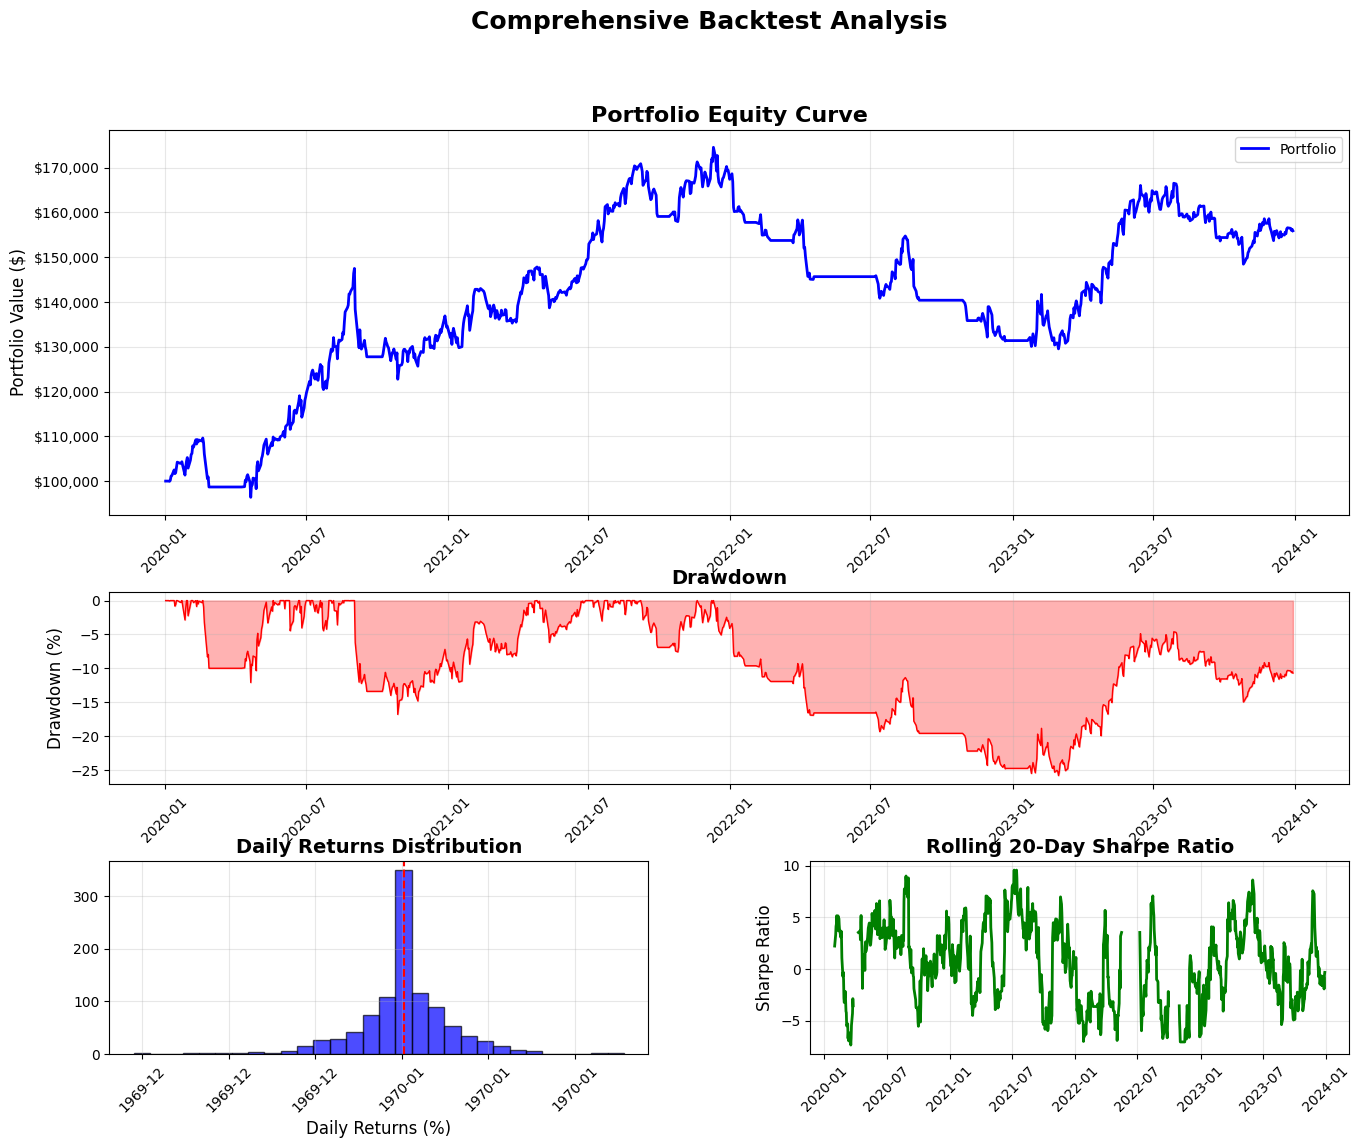

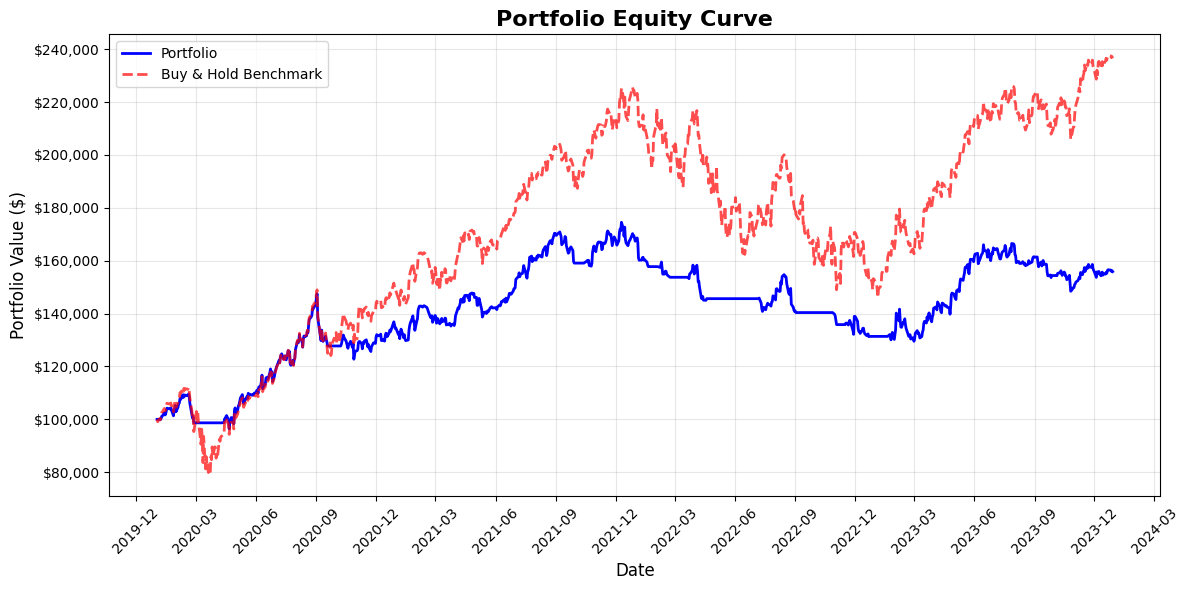

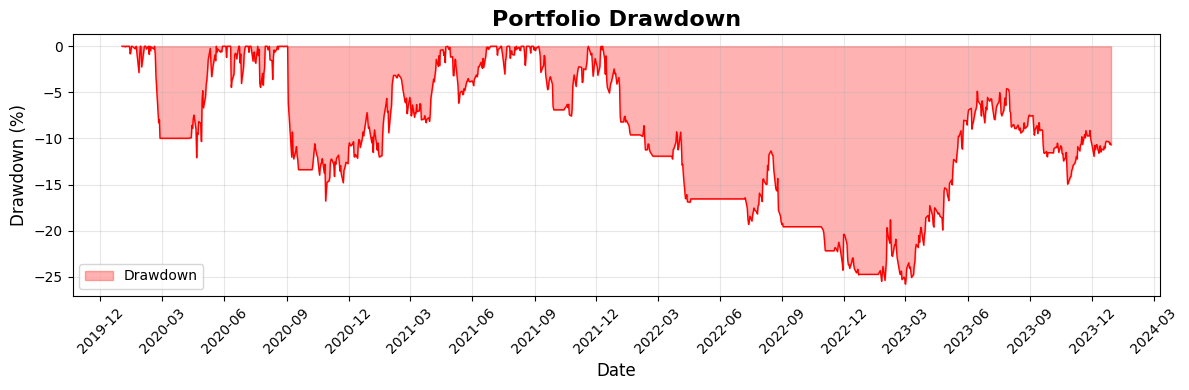

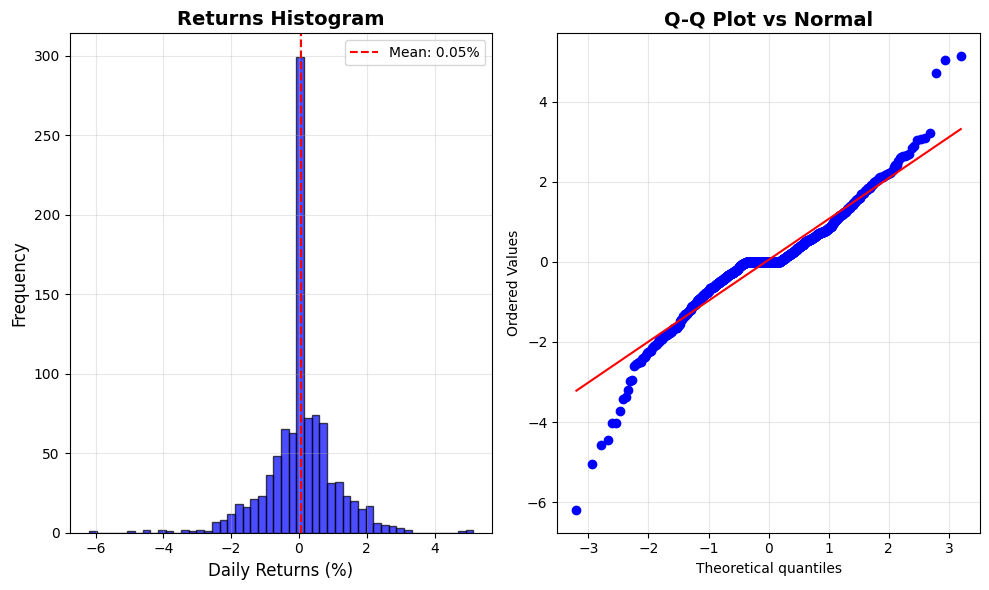

/Users/ethan/Documents/McMaster/CSE705/Final Project/Source Code/qbt/engine/viz.py:195: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_equity = df['Equity'].resample('M').last()


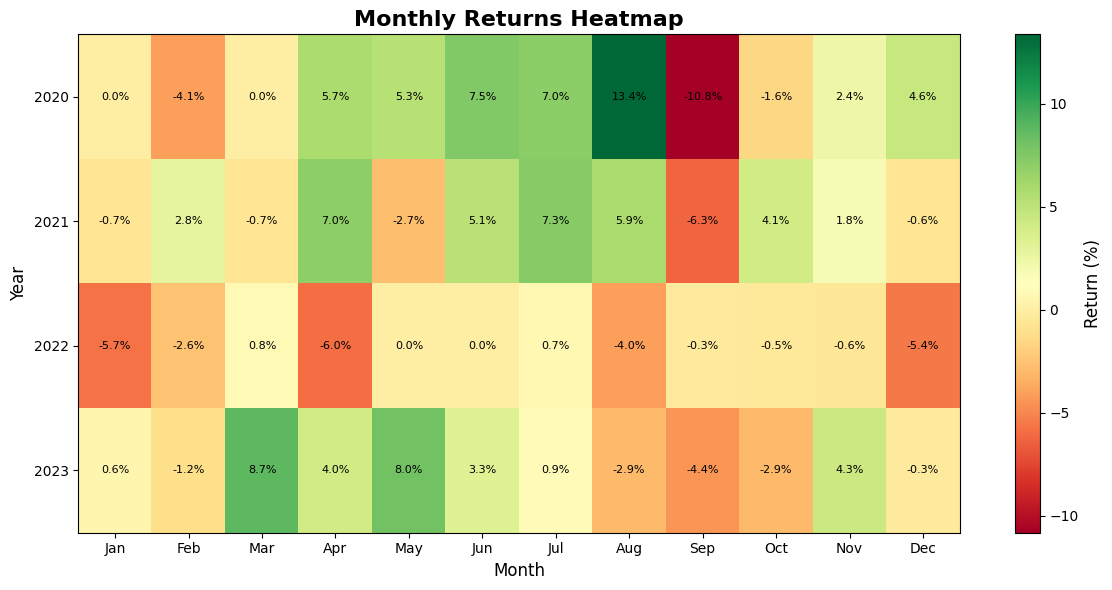


Generating PDF report...


/Users/ethan/Documents/McMaster/CSE705/Final Project/Source Code/qbt/engine/summary.py:414: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trades = trades_df.resample('M').size()


PDF report generated: backtest_report_20250910_032519.pdf
PDF report saved as: backtest_report_20250910_032519.pdf

Backtest completed successfully!


/Users/ethan/Documents/McMaster/CSE705/Final Project/Source Code/qbt/engine/viz.py:195: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_equity = df['Equity'].resample('M').last()


0

In [1]:
# Run the built-in example
from qbt.examples.run_example import main
main()